#   Introduction to Neural Networks in TensorFlow

In [2]:
import tensorflow as tf
tf.__version__


'2.8.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
X = np.array([float(i) for i in range(-7, 15, 3)])
Y = np.array([float(i+10) for i in range(-7, 15, 3)])
X,Y


(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

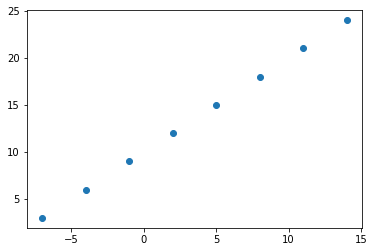

In [5]:
plt.scatter(X, Y)


In [6]:
Y = np.array([float(i+10) for i in range(-7, 15, 3)])
Y


array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [7]:
X + 10


array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [8]:
Y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and Output Shapes


In [9]:
#
house_info = tf.constant(["bathroom", "bedroom", "garage"])
house_price = tf.constant([90000])

house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bathroom', b'bedroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([90000])>)

In [10]:
input_shape = X.shape
output_shape = Y.shape

input_shape, output_shape


((8,), (8,))

In [11]:
X = tf.constant(X)
Y = tf.constant(Y)
X, Y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
X[0].shape, Y[0].shape


(TensorShape([]), TensorShape([]))

### Creating a Model

In [13]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=tf.keras.metrics.mae
)

model.fit(tf.expand_dims(X,-1), Y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mean_absolute_error: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mean_absolute_error: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mean_absolute_error: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mean_absolute_error: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mean_absolute_error: 10.9748


In [14]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

### Improvement 1

In [15]:

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mae
              )
with tf.device("/gpu:0"):
    model1.fit(tf.expand_dims(X, -1), Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 410ms/step - loss: 11.2219 - mean_absolute_error: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mean_absolute_error: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mean_absolute_error: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mean_absolute_error: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mean_absolute_error: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mean_absolute_error: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mean_absolute_error: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mean_absolute_error: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mean_absolute_error: 10.1619
Epoch 10

In [ ]:
model1.predict([17.0])

array([[29.739855]], dtype=float32)

### Improvement 2

In [ ]:

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=tf.keras.metrics.mae
               )
with tf.device("/gpu:0"):
    model2.fit(tf.expand_dims(X, -1), Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 559ms/step - loss: 12.3193 - mean_absolute_error: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7804 - mean_absolute_error: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2324 - mean_absolute_error: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6601 - mean_absolute_error: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0632 - mean_absolute_error: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4503 - mean_absolute_error: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7991 - mean_absolute_error: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1072 - mean_absolute_error: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3691 - mean_absolute_error: 7.3691
Epoch 10/100
1/1

In [ ]:
model2.predict([17.0])

array([[31.223137]], dtype=float32)

In [ ]:

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=tf.keras.metrics.mae
               )
with tf.device("/gpu:0"):
    model3.fit(tf.expand_dims(X, -1), Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 579ms/step - loss: 12.2895 - mean_absolute_error: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7908 - mean_absolute_error: 11.7908
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2845 - mean_absolute_error: 11.2845
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7678 - mean_absolute_error: 10.7678
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2381 - mean_absolute_error: 10.2381
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6928 - mean_absolute_error: 9.6928
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.1289 - mean_absolute_error: 9.1289
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.5437 - mean_absolute_error: 8.5437
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.9341 - mean_absolute_error: 7.9341
Epoch 10/100
1/1

In [ ]:
model3.predict([17.0])

array([[30.220291]], dtype=float32)

In [ ]:

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=tf.keras.metrics.mae
               )
with tf.device("/gpu:0"):
    model4.fit(tf.expand_dims(X, -1), Y, epochs=100)


Epoch 1/100


C:\Users\ISHAN\.conda\envs\gputest\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 556ms/step - loss: 12.5419 - mean_absolute_error: 12.5419
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.4726 - mean_absolute_error: 12.4726
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.4032 - mean_absolute_error: 12.4032
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3338 - mean_absolute_error: 12.3338
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 12.2644 - mean_absolute_error: 12.2644
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1950 - mean_absolute_error: 12.1950
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1256 - mean_absolute_error: 12.1256
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 12.0561 - mean_absolute_error: 12.0561
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 11.9866 - mean_absolute_error: 11.9866
Epoch 10/100
1/1 [==

In [ ]:
model4.predict([17.0])

array([[31.509909]], dtype=float32)

### Evaluating Model

> "Visualize, Visualize, Visualize"

In [ ]:
# Make bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [ ]:
Y = 10+X
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

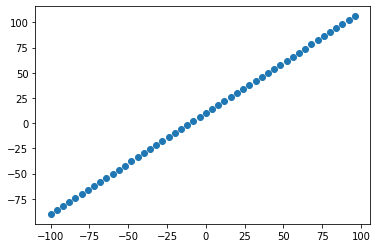

In [ ]:
plt.scatter(X,Y)

In [ ]:
# The 3 sets...
DATASET_SIZE = X.numpy().size

X_train = X[:round(0.8*DATASET_SIZE)]
X_test = X[round(0.8*DATASET_SIZE):]

Y_train = Y[:round(0.8*DATASET_SIZE)]
Y_test = Y[round(0.8*DATASET_SIZE):]



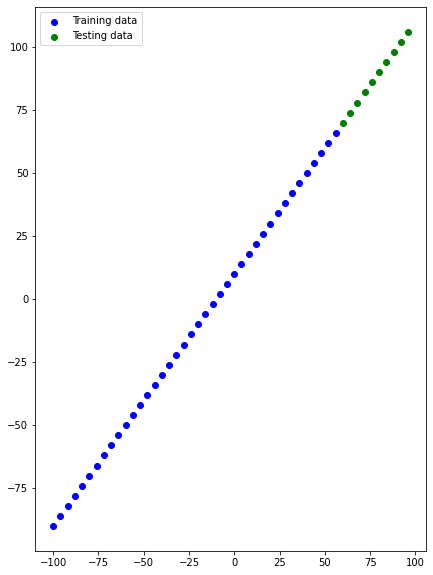

In [ ]:
#Visualising the data

plt.figure(figsize=(7,10))

plt.scatter(X_train,Y_train,c='b', label='Training data')

plt.scatter(X_test,Y_test,c='g', label='Testing data')
plt.legend()

## Creating a neural network

In [ ]:

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.linear),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation=None),
], name='test_model')

model5.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=tf.keras.metrics.mae
               )
# with tf.device("/gpu:0"):
#     model5.fit(tf.expand_dims(X_test, -1), Y_train, epochs=100)


In [ ]:
model5.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device("/gpu:0"):
    model5.fit(tf.expand_dims(X_train, -1), Y_train, verbose=1, epochs=100)

NameError: name 'tf' is not defined

In [ ]:
model5.predict(X_test)
# model5.summary()

array([[60.885   ],
       [64.701065],
       [68.517136],
       [72.3332  ],
       [76.14927 ],
       [79.96533 ],
       [83.7814  ],
       [87.597466],
       [91.41353 ],
       [95.22959 ]], dtype=float32)

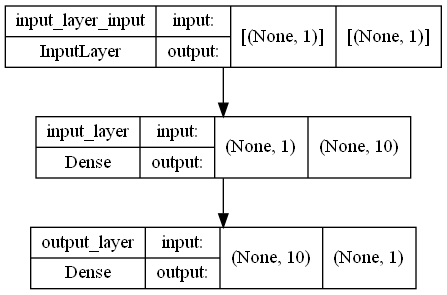

In [ ]:
tf.keras.utils.plot_model(model=model5,show_shapes=True)

In [ ]:
#Visualizing model predictions
Y_pred = model5.predict(X_test)
Y_pred

array([[60.885   ],
       [64.701065],
       [68.517136],
       [72.3332  ],
       [76.14927 ],
       [79.96533 ],
       [83.7814  ],
       [87.597466],
       [91.41353 ],
       [95.22959 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

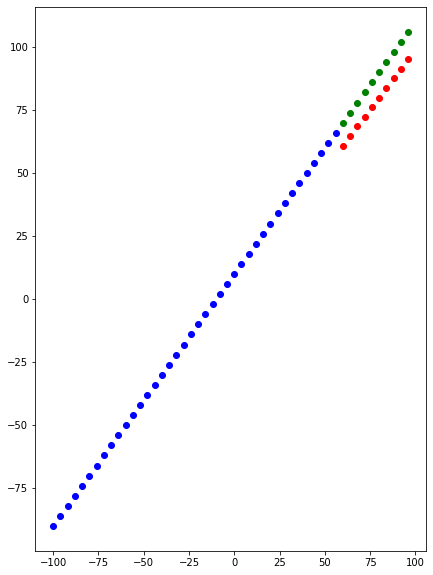

In [ ]:
# Plotting Function

def plot_predictions(train_data=X_train,
                   train_labels=Y_train,
                   test_data=X_test,
                   test_labels=Y_test,
                   predictions=Y_pred
                   ):
            plt.figure(figsize=(7,10))
            plt.scatter(train_data,train_labels,c='b',label='Training Data')
            plt.scatter(test_data,test_labels,c='g',label='Testing Data')
            plt.scatter(test_data,predictions,c='r',label='Testing Data')

plot_predictions()